## Pandas Tutorial
This document contains a mix of material from William Liu and the Pandas cookbook. This is meant to improve my familiarity with pandas operations. 

In [7]:
import pandas as pd
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


#### Useful Functions

In [4]:
import numpy as np

## 'CCC' mRows closest to selected value
aValue = 42.0

df.loc[(df.CCC-aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [9]:
## Assign value based on conditions of other columns (If conditions AAA column is changed)
df.loc[(df['BBB'] > 25) & (df['CCC'] <= 75), 'AAA'] = 0.1

df

,AAA,BBB,CCC
0,4.0,10,100
1,5.0,20,50
2,0.1,30,-30
3,0.1,40,-50


In [11]:
### Using Numpy where() 
df['logic'] = np.where(df['AAA'] > 3,'high','low')
df

,AAA,BBB,CCC,logic
0,4.0,10,100,high
1,5.0,20,50,high
2,0.1,30,-30,low
3,0.1,40,-50,low


In [12]:
## Split DataFrame by Boolean
dflow = df[df.AAA <= 3]
dflow

,AAA,BBB,CCC,logic
2,0.1,30,-30,low
3,0.1,40,-50,low


In [15]:
from functools import reduce

## Filter Multiple Critera
Crit1 = df.AAA >= 3.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC > -40.0

## Merge Criteria
CritList = [Crit1,Crit2,Crit3]
AllCrit = reduce(lambda x,y: x & y, CritList)

## Filter DF
df[AllCrit]

,AAA,BBB,CCC,logic
0,4.0,10,100,high


### DataFrame Operations

In [34]:
## Sorting
df.sort_values(by='CCC',ascending=False)

,AAA,BBB,CCC,logic
0,4.0,10,100,high
1,5.0,20,50,high
2,0.1,30,-30,low
3,0.1,40,-50,low


In [20]:
## Row List Slicing
df.iloc[1:3]  #Position-Oriented

,AAA,BBB,CCC,logic
1,5.0,20,50,high
2,0.1,30,-30,low


In [21]:
df.loc[1:3] #Label-Oriented

,AAA,BBB,CCC,logic
1,5.0,20,50,high
2,0.1,30,-30,low
3,0.1,40,-50,low


In [24]:
## Set Row Index
df.set_index('AAA')

,BBB,CCC,logic
AAA,,,
4.0,10,100,high
5.0,20,50,high
0.1,30,-30,low
0.1,40,-50,low


In [31]:
## Show top 5 rows
df.head()

## Show Bottom 3 Rows
df.tail(3)

## IQR count mean std
df.describe()

## Get Variance
df.var()

## Transpose Data
df.T

## Columns (NOTE: no parathensis)
df.columns

## Rows
df.index

## Values
df.values

array([[4.0, 10, 100, 'high'],
       [5.0, 20, 50, 'high'],
       [0.1, 30, -30, 'low'],
       [0.1, 40, -50, 'low']], dtype=object)

In [40]:
## isin Function
df['E'] = ['one', 'one','two','three']
df[(df.E).isin(['one'])]

,AAA,BBB,CCC,logic,E
0,4.0,10,100,high,one
1,5.0,20,50,high,one


In [42]:
## Grouping
df.groupby('E').sum()

,AAA,BBB,CCC
E,,,
one,9.0,30,150
three,0.1,40,-50
two,0.1,30,-30


In [46]:
## Iteration
print('Iterate by Rows')
for index, row in df.iterrows():
    print(index, row['BBB'])
print('Iterate by Columns')
for index, col in df.iteritems():
    print(index, col[0])

Iterate by Rows
0 10
1 20
2 30
3 40
Iterate by Columns
AAA 4.0
BBB 10
CCC 100
logic high
E one


In [51]:
print(df.dtypes)

## Change data types
df.AAA = (df.AAA).astype('int64')
print(df.dtypes)

AAA       int64
BBB       int64
CCC       int64
logic    object
E        object
dtype: object
AAA       int64
BBB       int64
CCC       int64
logic    object
E        object
dtype: object


In [62]:
## Apply function to Column or Rows 
my_function = lambda x: x.max() - x.min()
df2 = df.iloc[0:4,0:3]

## Apply to Columns
df2.apply(my_function, axis=0)

## Apply to rows 
#df2.apply(my_function, axis=1)

AAA      5
BBB     30
CCC    150
dtype: int64

In [64]:
## Apply function to entire DataFrame
my_format = lambda x: '%.2f' % x  #2 decimal places
df2.applymap(my_format)

,AAA,BBB,CCC
0,4.00,10.00,100.00
1,5.00,20.00,50.00
2,0.00,30.00,-30.00
3,0.00,40.00,-50.00


In [79]:
## Covariance
df2.cov()


## Correlations
df2.corr()

## CorrWith
df2.corrwith(df2['AAA'])

AAA    1.000000
BBB   -0.834497
CCC    0.892500
dtype: float64

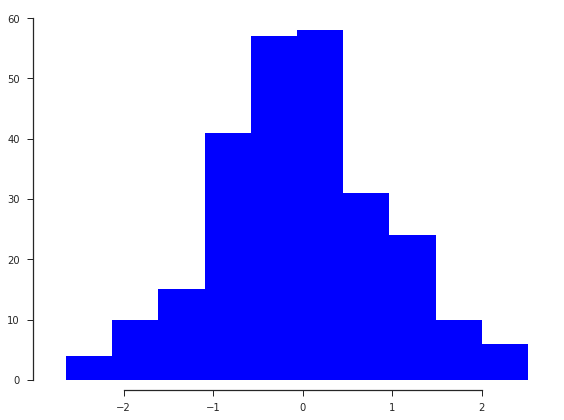

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')
# Data to be represented
X = np.random.randn(256)

# Actual plotting
fig = plt.figure(figsize=(8,6), dpi=72, facecolor="white")
axes = plt.subplot(111)
heights, positions, patches = axes.hist(X, color='blue')
seaborn.despine(ax=axes, offset=10, trim=True)
fig.tight_layout()
plt.show()

(array([7.5000e+01, 9.2300e+02, 5.9130e+03, 2.0018e+04, 3.2785e+04,
        2.6893e+04, 1.0957e+04, 2.2090e+03, 2.1000e+02, 1.7000e+01]),
 array([-4.05110836, -3.19171775, -2.33232714, -1.47293654, -0.61354593,
         0.24584468,  1.10523529,  1.96462589,  2.8240165 ,  3.68340711,
         4.54279772]),
 <a list of 10 Patch objects>)

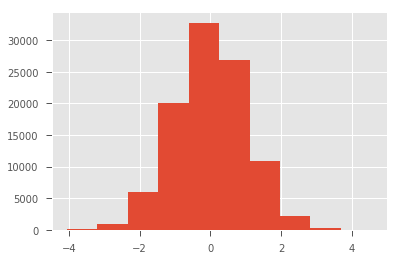

In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')

plt.hist(np.random.randn(100000))